# **Problem Statement**

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut.

# **Objective**

Membuat model clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan FundFusion dengan Silhoutte Score >0,7.

# **Variabel**

- GCIF: unique identifier nasabah.
- Area: lokasi nasabah (Jakarta, Bogor, Bandung, Surabaya, Jogja, Solo).
- Jalur_Pembukaan: touch points nasabah membuka produk (cabang, telemarking, aplikasi digital, internet banking).
- Vintage: durasi menjadi nasabah (sejak pembukaan akun).
- Usia: usia nasabah.
- Jenis_Kelamin: Laki-laki (1) dan Perempuan (0).
- Status_Perkawinan: Belum menikah (0), Menikah (1), Cerai (2), Janda/Duda (3).
- Jumlah_Anak: jumlah anak (numerik).
- Pendidikan: status pendidikan terakhir (Tidak memiliki pendidikan formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)).
- Produk_Tabungan: status kepemilikan produk (yes (1) atau no (0)).
- Produk_Deposito: status kepemilikan produk (yes (1) atau no (0)).
- Produk_Kartu_Kredit: status kepemilikan produk (yes (1) atau no (0)).
- Produk_Kredit_Rumah: status kepemilikan produk (yes (1) atau no (0)).
- Produk_Kredit_Kendaraan: status kepemilikan produk (yes (1) atau no (0)).
- Produk_Kredit_Dana_Tunai: status kepemilikan produk (yes (1) atau no (0)).
- Total_Kepemilikan_Produk: jumlah produk yang dimiliki (penjumlahan dari produk yang dimiliki).
- Pendapatan_Tahunan: rata-rata pendapatan dalam setahun.
- Total_Relationship_Balance: total aset nasabah dalam cutoff bulan observasi.

# **Experiment**
1. Dikelompokkan berdasarkan demografis untuk dicari pola kepemilikan produk.
2. Dikelompokkan berdasarkan kepemilikan produk untuk dicari pola berdasarkan demografi.

## **Import Package**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
pd.set_option('display.max_columns', None)

## **Data for Clustering**

In [ ]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)
data.dtypes

,0
GCIF,object
Area,object
Jalur_Pembukaan,object
Vintage,object
Usia,float64
Jenis_Kelamin,object
Status_Perkawinan,object
Jumlah_Anak,int64
Pendidikan,object
Produk_Tabungan,int64


## **Data Understanding**

In [ ]:
data.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


In [ ]:
# Menghitung rata-rata hanya untuk kolom numerik
data.groupby('Area').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [ ]:
data.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [ ]:
data.groupby('Vintage').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [ ]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


In [ ]:
data.groupby('Jalur_Pembukaan').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [ ]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


In [ ]:
data.groupby('Status_Perkawinan').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


## **Data Preparation**

### Pengecekan Data Duplikat dan *Missing Data*

In [ ]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


### Pengecekan Data Outlier

In [ ]:
data.count()

,0
GCIF,24084
Area,24084
Jalur_Pembukaan,24084
Vintage,24084
Usia,24084
Jenis_Kelamin,24084
Status_Perkawinan,24084
Jumlah_Anak,24084
Pendidikan,24084
Produk_Tabungan,24084


In [ ]:
# Mendeteksi dan mengatasi outlier (misal dibagi dengan Z-score)
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data [(z_scores < 3). all(axis=1)] #mengapus z-score >3


In [ ]:
data.count()

,0
GCIF,23704
Area,23704
Jalur_Pembukaan,23704
Vintage,23704
Usia,23704
Jenis_Kelamin,23704
Status_Perkawinan,23704
Jumlah_Anak,23704
Pendidikan,23704
Produk_Tabungan,23704


### **Filtering data telemarketing only**

In [ ]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [ ]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [ ]:
data0 = data0.drop(columns=['GCIF', 'Jalur_Pembukaan']). reset_index(drop=True)

In [ ]:
data0 = data0.reset_index()

In [ ]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


### **Pembagian dataset experiment**

1. Eksperimen 0: semua variabel digunakan.
2. Eksperimen 1: menggunakan demographics.
3. Eksperimen 2: menggunakan financial related variable.

In [ ]:
data1 = data0.iloc[:, 1:8]

In [ ]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [ ]:
data2 = data0.iloc[:, 8:17]

In [ ]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


### **Melakukan Encoding untuk Data Category**

In [ ]:
data1 = pd.get_dummies(data1, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])

In [ ]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


### **Standarisasi Data Numerik**

In [ ]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [ ]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


### **Pengecekan Korelasi**

In [ ]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [ ]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [ ]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


Gabungkan keduanya

In [ ]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


## Modeling & Evaluation

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid
dengan pengecekan silhouette score.

### **1. K-Means**

Eksperimen 0

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, cluster_labels)
  print(f"Silhouette Score (K-Means) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp0'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.43731081737346444
Silhouette Score (K-Means) -4 : 0.37992431452339676
Silhouette Score (K-Means) -5 : 0.3231396807582395


Eksperimen 1

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, cluster_labels)
  print(f"Silhouette Score (K-Means) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp1'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5021981273872203
Silhouette Score (K-Means) -4 : 0.48877557780538605
Silhouette Score (K-Means) -5 : 0.4210233962025565


Eksperimen 2

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(data2)
  silhouette_avg = silhouette_score(data2, cluster_labels)
  print(f"Silhouette Score (K-Means) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp2'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5643846570786952
Silhouette Score (K-Means) -4 : 0.5778231542047191
Silhouette Score (K-Means) -5 : 0.5652330032962668


### 2. K-Medoids

In [ ]:
pip install scikit-learn-extra

Eksperimen 0

In [ ]:
for n_clusters in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, cluster_labels)
  print(f"Silhouette Score (K-Medoids) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp0'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


Eksperimen 1

In [ ]:
for n_clusters in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, cluster_labels)
  print(f"Silhouette Score (K-Medoids) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp0'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.0050675633465087746


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.4657942038387023


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4178025801646672


Eksperimen 2

In [ ]:
for n_clusters in range(3, 6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(data2)
  silhouette_avg = silhouette_score(data2, cluster_labels)
  print(f"Silhouette Score (K-Medoids) -"+str (n_clusters)+" : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp0'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5626530760157834
Silhouette Score (K-Medoids) -4 : 0.5357689190213674
Silhouette Score (K-Medoids) -5 : 0.5177310638022975


## **Analisa Hasil**

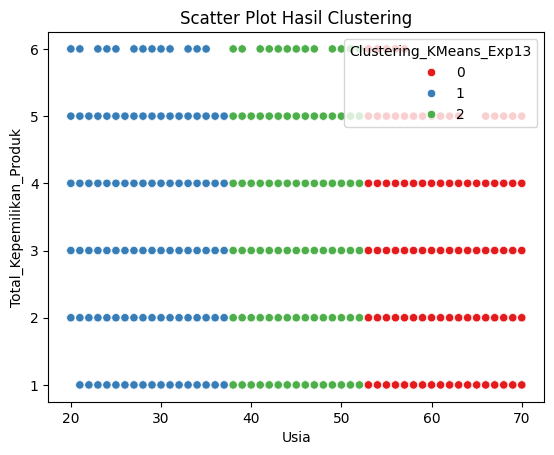

In [61]:
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp13', palette='Set1')

plt.title('Scatter Plot Hasil Clustering')
plt.show()

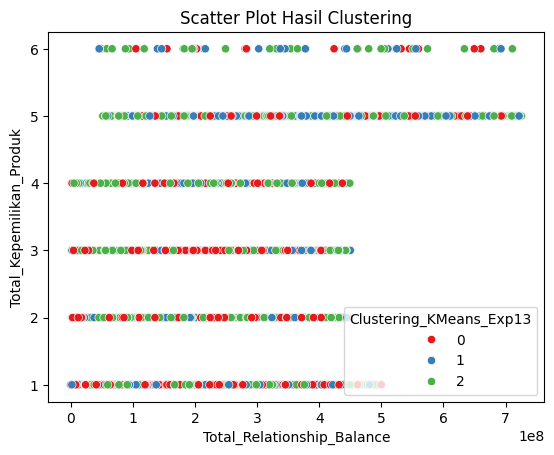

In [70]:
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp13', palette='Set1')

plt.title('Scatter Plot Hasil Clustering')
plt.show()

In [71]:
cluster_means = data0[['Usia', 'Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp13']].groupby('Clustering_KMeans_Exp13').mean()
cluster_means

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Total_Relationship_Balance
Clustering_KMeans_Exp13,,,,,,,,,,
0,58.840056,1.474672,0.657129,0.600844,0.338649,0.618668,0.168386,0.546435,2.930113,2.389776e+08
1,29.503177,1.191528,1.000000,0.592436,0.308018,0.586989,0.157337,0.599092,3.243873,2.439352e+08
2,45.571206,1.310945,0.983520,0.602612,0.336443,0.557214,0.156716,0.521455,3.157960,2.377450e+08


#### Group 0

In [75]:
data0[data0['Clustering_KMeans_Exp13']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2132.000000,2132.000000,2132.000000,2.132000e+03
mean,58.840056,1.474672,2.930113,2.389776e+08
std,5.133619,1.467245,1.041285,1.379077e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,55.000000,0.000000,2.000000,1.266333e+08
50%,57.000000,1.000000,3.000000,2.328763e+08
75%,62.000000,3.000000,4.000000,3.493216e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [76]:
data0[data0['Clustering_KMeans_Exp13']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.478893
Bandung,0.166041
Solo,0.128987
Surabaya,0.126173
Jogja,0.072702
Bogor,0.027205


In [77]:
data0[data0['Clustering_KMeans_Exp13']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486867
< 1 Tahun,0.313321
> 4 Tahun,0.199812


In [78]:
data0[data0['Clustering_KMeans_Exp13']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.258443
SD,0.204972
SMA,0.180113
Tidak Sekolah Formal,0.101313
Magister,0.088180
SMP,0.083959
Doktor,0.083021


In [79]:
data0[data0['Clustering_KMeans_Exp13']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.668386
Perempuan,0.331614


Group 1

In [80]:
data0[data0['Clustering_KMeans_Exp13']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [81]:
data0[data0['Clustering_KMeans_Exp13']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.478893
Bandung,0.166041
Solo,0.128987
Surabaya,0.126173
Jogja,0.072702
Bogor,0.027205


In [82]:
data0[data0['Clustering_KMeans_Exp13']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486867
< 1 Tahun,0.313321
> 4 Tahun,0.199812


In [83]:
data0[data0['Clustering_KMeans_Exp13']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.258443
SD,0.204972
SMA,0.180113
Tidak Sekolah Formal,0.101313
Magister,0.088180
SMP,0.083959
Doktor,0.083021


In [84]:
data0[data0['Clustering_KMeans_Exp13']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.668386
Perempuan,0.331614


Group 2

In [85]:
data0[data0['Clustering_KMeans_Exp13']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3216.000000,3216.000000,3216.000000,3.216000e+03
mean,45.571206,1.310945,3.157960,2.377450e+08
std,4.278838,1.482616,1.045431,1.437032e+08
min,38.000000,0.000000,1.000000,1.384147e+06
25%,42.000000,0.000000,2.000000,1.166975e+08
50%,46.000000,1.000000,3.000000,2.309003e+08
75%,50.000000,3.000000,4.000000,3.468400e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [86]:
data0[data0['Clustering_KMeans_Exp13']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.478893
Bandung,0.166041
Solo,0.128987
Surabaya,0.126173
Jogja,0.072702
Bogor,0.027205


In [87]:
data0[data0['Clustering_KMeans_Exp13']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486867
< 1 Tahun,0.313321
> 4 Tahun,0.199812


In [88]:
data0[data0['Clustering_KMeans_Exp13']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.258443
SD,0.204972
SMA,0.180113
Tidak Sekolah Formal,0.101313
Magister,0.088180
SMP,0.083959
Doktor,0.083021


In [89]:
data0[data0['Clustering_KMeans_Exp13']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.668386
Perempuan,0.331614


# **Kesimpulan**

Dalam proses clustering menggunakan dua metode, yaitu K-Means dan K-Medoids, evaluasi dilakukan menggunakan Silhouette Score. Hasilnya menunjukkan bahwa model K-Means pada eksperimen 2 memberikan hasil terbaik dengan Silhouette Score sebesar 0.5778231542047191, meskipun nilai ini masih berada di bawah target ideal Silhouette Score >0.7. Sementara itu, model K-Medoids mencapai Silhouette Score tertinggi sebesar 0.5626530760157834, juga pada eksperimen 2, namun tetap lebih rendah dibandingkan dengan hasil dari K-Means.

Dari hasil clustering K-Means pada eksperimen 2, ditemukan tiga kelompok dengan karakteristik sebagai berikut:

**Cluster 0**:
- Usia rata-rata: 58.84 tahun
- Jumlah anak rata-rata: 1.47
- Kepemilikan produk tabungan: 65.71%
-Kepemilikan produk deposito: 60.08%
- Kepemilikan kartu kredit: 33.86%
- Kepemilikan kredit rumah: 61.86%
- Kepemilikan kredit kendaraan: 16.83%
- Kepemilikan kredit dana tunai: 54.56%
-Total kepemilikan produk: 2.93
- Total saldo hubungan: Rp 238,977,600

**Cluster 1**:
- Usia rata-rata: 29.50 tahun
- Jumlah anak rata-rata: 1.19
- Kepemilikan produk tabungan: 100%
- Kepemilikan produk deposito: 59.24%
- Kepemilikan kartu kredit: 30.80%
- Kepemilikan kredit rumah: 58.69%
- Kepemilikan kredit kendaraan: 15.73%
- Kepemilikan kredit dana tunai: 59.90%
- Total kepemilikan produk: 3.24
- Total saldo hubungan: Rp 243,935,200

**Cluster 2**:
- Usia rata-rata: 45.57 tahun
- Jumlah anak rata-rata: 1.31
- Kepemilikan produk tabungan: 98.35%
- Kepemilikan produk deposito: 60.26%
- Kepemilikan kartu kredit: 33.64%
- Kepemilikan kredit rumah: 55.72%
- Kepemilikan kredit kendaraan: 15.67%
- Kepemilikan kredit dana tunai: 52.14%
- Total kepemilikan produk: 3.15
- Total saldo hubungan: Rp 237,745,500